In [1]:
import os # sd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

# 1. Reading the Dataset

In [2]:
input_size = 299

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True#it doesnt make much sense but somehow it performed better.
)

train_ds = train_gen.flow_from_directory(
    '/kaggle/input/clothingdatasetsmall/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    '/kaggle/input/clothingdatasetsmall/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


# 2. Making the Model

In [3]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.2):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [4]:
#saving the best model
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v5_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [5]:
learning_rate = 0.0005
size = 100
droprate = 0.2
input_size = 299

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=10, validation_data=val_ds,
                   callbacks=[checkpoint])

2021-12-25 19:47:19.702389: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-25 19:47:19.792147: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-25 19:47:19.792975: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-25 19:47:19.794096: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

83697664/83683744 [==============================] - 1s 0us/step


2021-12-25 19:47:24.793510: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2021-12-25 19:47:28.904917: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


96/96 [==============================] - 93s 883ms/step - loss: 1.0380 - accuracy: 0.6737 - val_loss: 0.5173 - val_accuracy: 0.8622


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
96/96 [==============================] - 75s 784ms/step - loss: 0.5197 - accuracy: 0.8295 - val_loss: 0.4193 - val_accuracy: 0.8534
Epoch 3/10
96/96 [==============================] - 76s 787ms/step - loss: 0.4505 - accuracy: 0.8458 - val_loss: 0.3992 - val_accuracy: 0.8710
Epoch 4/10
96/96 [==============================] - 75s 780ms/step - loss: 0.3889 - accuracy: 0.8657 - val_loss: 0.3675 - val_accuracy: 0.8739
Epoch 5/10
96/96 [==============================] - 75s 785ms/step - loss: 0.3551 - accuracy: 0.8791 - val_loss: 0.3598 - val_accuracy: 0.8739
Epoch 6/10
96/96 [==============================] - 75s 782ms/step - loss: 0.3228 - accuracy: 0.8810 - val_loss: 0.3641 - val_accuracy: 0.8886
Epoch 7/10
96/96 [==============================] - 76s 790ms/step - loss: 0.2988 - accuracy: 0.8960 - val_loss: 0.3846 - val_accuracy: 0.8563
Epoch 8/10
96/96 [==============================] - 75s 780ms/step - loss: 0.2755 - accuracy: 0.9094 - val_loss: 0.3827 - val_accuracy: 0.8827

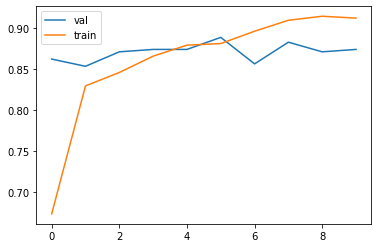

In [6]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

# 3. Loading Test data & Deep learning model

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

In [8]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    '/kaggle/input/clothingdatasetsmall/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)
model = keras.models.load_model('./input/tryingthis/xception_v5_1_10_0.889.h5')

Found 372 images belonging to 10 classes.


OSError: SavedModel file does not exist at: ./input/tryingthis/xception_v5_1_10_0.889.h5/{saved_model.pbtxt|saved_model.pb}

# 4. Evaluating the model

In [ ]:
model.evaluate(test_ds)

## Testing the model on random picture

In [ ]:
path = '../input/clothingdatasetsmall/test/shorts/06248e28-9e26-4036-8a8f-40cc605c83fb.jpg'

img = load_img(path, target_size=(299, 299))
x = np.array(img)
X = np.array([x])
X.shape
X = preprocess_input(X)
pred = model.predict(X)


In [ ]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

result = dict(zip(classes, pred[0]))
max_key = max(result, key=result.get)

print ("your picture contains %s " %(max_key))

In [ ]:
result

In [ ]:
result